In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Configuração de estilo para gráficos
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.grid'] = True

# Dados simulados baseados no dml.sql
consultas_data = {
    'Id_consulta': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12],
    'Id_paciente': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1],
    'Id_medico': [1, 2, 3, 4, 5, 7, 8, 9, 10, 1, 2],
    'Data_hora': ['2025-06-12 14:00:00', '2025-06-12 15:00:00', '2025-06-12 16:00:00',
                  '2025-06-12 17:00:00', '2025-06-12 18:00:00', '2025-06-12 20:00:00',
                  '2025-06-12 21:00:00', '2025-06-12 22:00:00', '2025-06-12 23:00:00',
                  '2025-06-13 09:00:00', '2025-06-13 10:00:00'],
    'Diagnostico': ['Taquicardia', 'Fratura', 'Febre alta', 'Dor de cabeça', 'Gripe',
                    'Visão turva', 'Infecção', 'Ansiedade', 'Ferimento', 'Gripe', 'Febre'],
    'Prioridade': ['Alta', 'Média', 'Alta', 'Baixa', 'Média', 'Média', 'Alta', 'Baixa', 'Alta', 'Média', 'Alta'],
    'Status': ['Concluída', 'Agendada', 'Concluída', 'Pendente', 'Concluída', 'Pendente',
               'Concluída', 'Agendada', 'Pendente', 'Concluída', 'Agendada'],
    'Especialidade': ['Cardiologia', 'Ortopedia', 'Pediatria', 'Neurologia', 'Clínica Geral',
                      'Oftalmologia', 'Ginecologia', 'Psiquiatria', 'Cirurgia', 'Clínica Geral', 'Pediatria']
}
medicamentos_data = {
    'Id_medicamento': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nome': ['Aspirina', 'Paracetamol', 'Amoxilina', 'Ibuprofeno', 'Omeprazol', 'Dipirona', 
             'Losartana', 'Atorvastatina', 'Salbutamol', 'Ciprofloxacino'],
    'Quantidade_estoque': [100, 150, 120, 80, 90, 110, 70, 95, 85, 75]
}
prescricoes_data = {
    'Id_prescricao': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Id_consulta': [1, 2, 3, 5, 7, 8, 9, 10, 1, 11, 12],
    'Id_medicamento': [1, 3, 2, 4, 7, 5, 9, 10, 8, 2, 3]
}

# Criando DataFrames
df_consultas = pd.DataFrame(consultas_data)
df_medicamentos = pd.DataFrame(medicamentos_data)
df_prescricoes = pd.DataFrame(prescricoes_data)

# Convertendo Data_hora para datetime
df_consultas['Data_hora'] = pd.to_datetime(df_consultas['Data_hora'])

print("DataFrames criados com sucesso!")
print("\nPrimeiras linhas de df_consultas:")
print(df_consultas.head())
print("\nPrimeiras linhas de df_medicamentos:")
print(df_medicamentos.head())
print("\nPrimeiras linhas de df_prescricoes:")
print(df_prescricoes.head())

DataFrames criados com sucesso!

Primeiras linhas de df_consultas:
   Id_consulta  Id_paciente  Id_medico           Data_hora    Diagnostico  \
0            1            1          1 2025-06-12 14:00:00    Taquicardia   
1            2            2          2 2025-06-12 15:00:00        Fratura   
2            3            3          3 2025-06-12 16:00:00     Febre alta   
3            4            4          4 2025-06-12 17:00:00  Dor de cabeça   
4            5            5          5 2025-06-12 18:00:00          Gripe   

  Prioridade     Status  Especialidade  
0       Alta  Concluída    Cardiologia  
1      Média   Agendada      Ortopedia  
2       Alta  Concluída      Pediatria  
3      Baixa   Pendente     Neurologia  
4      Média  Concluída  Clínica Geral  

Primeiras linhas de df_medicamentos:
   Id_medicamento         Nome  Quantidade_estoque
0               1     Aspirina                 100
1               2  Paracetamol                 150
2               3    Amoxilina   

In [5]:
# 1. Tipos de Amostragem: Amostragem aleatória de 40% das consultas
amostra = df_consultas.sample(frac=0.4, random_state=42)

print("\nAmostra aleatória das consultas (40% do total):")
print(amostra[['Id_consulta', 'Diagnostico', 'Prioridade', 'Status']])

# Salva a amostra para uso posterior
amostra.to_csv('amostra_consultas.csv', index=False)

# Tamanho da Amostra
print(f"Tamanho da amostra: {len(amostra)}")
# Justificativa
print("\nJustificativa: A amostragem aleatória foi escolhida para garantir representatividade "
      "sem viés, selecionando 40% das consultas para análise exploratória.")


Amostra aleatória das consultas (40% do total):
    Id_consulta  Diagnostico Prioridade     Status
5             7  Visão turva      Média   Pendente
0             1  Taquicardia       Alta  Concluída
9            11        Gripe      Média  Concluída
10           12        Febre       Alta   Agendada
Tamanho da amostra: 4

Justificativa: A amostragem aleatória foi escolhida para garantir representatividade sem viés, selecionando 40% das consultas para análise exploratória.


In [6]:

# 2. Escalas de Medição
print("\nEscalas de Medição das Variáveis:")
print(f"Status ({df_consultas['Status'].unique()}): Nominal (categorias sem ordem).")
print(f"Prioridade ({df_consultas['Prioridade'].unique()}): Ordinal (categorias ordenadas).")
print(f"Quantidade_estoque ({df_medicamentos['Quantidade_estoque'].min()}-{df_medicamentos['Quantidade_estoque'].max()}): Razão (zero absoluto, proporções).")
print(f"Data_hora ({df_consultas['Data_hora'].min()}-{df_consultas['Data_hora'].max()}): Intervalar (intervalos iguais, sem zero absoluto).")


Escalas de Medição das Variáveis:
Status (['Concluída' 'Agendada' 'Pendente']): Nominal (categorias sem ordem).
Prioridade (['Alta' 'Média' 'Baixa']): Ordinal (categorias ordenadas).
Quantidade_estoque (70-150): Razão (zero absoluto, proporções).
Data_hora (2025-06-12 14:00:00-2025-06-13 10:00:00): Intervalar (intervalos iguais, sem zero absoluto).


In [8]:
# 3. Medidas de Tendência Central (Quantidade_estoque)
media_estoque = df_medicamentos['Quantidade_estoque'].mean()
mediana_estoque = df_medicamentos['Quantidade_estoque'].median()
moda_estoque = df_medicamentos['Quantidade_estoque'].mode()

print("\nMedidas de Tendência Central (Quantidade_estoque):")
print(f"Média: {media_estoque:.2f} unidades")
print(f"Mediana: {mediana_estoque:.2f} unidades")
if len(moda_estoque) == len(df_medicamentos['Quantidade_estoque']):
    print("Moda: Não há moda (valores únicos)")
else:
    print(f"Moda: {moda_estoque[0]:.2f} unidades")

print("\nInterpretação: A média indica o estoque médio, a mediana o valor central, e a moda "
      "representa a quantidade mais frequente, se houver. Nesse caso, todos os valores são únicos.")


Medidas de Tendência Central (Quantidade_estoque):
Média: 97.50 unidades
Mediana: 92.50 unidades
Moda: Não há moda (valores únicos)

Interpretação: A média indica o estoque médio, a mediana o valor central, e a moda representa a quantidade mais frequente, se houver. Nesse caso, todos os valores são únicos.


In [31]:
# 4. Medidas de Dispersão (Quantidade_estoque)
amplitude_estoque = df_medicamentos['Quantidade_estoque'].max() - df_medicamentos['Quantidade_estoque'].min()
variancia_estoque = df_medicamentos['Quantidade_estoque'].var()
desvio_padrao_estoque = df_medicamentos['Quantidade_estoque'].std()

print("Quantidade mínima no estoque:",df_medicamentos['Quantidade_estoque'].min(), "\nQuantidade máxima no estoque: ",df_medicamentos['Quantidade_estoque'].max())

print("\nMedidas de Dispersão (Quantidade_estoque):")
print(f"Amplitude: {amplitude_estoque:.2f} unidades")
print(f"Variância: {variancia_estoque:.2f} unidades²")
print(f"Desvio Padrão: {desvio_padrao_estoque:.2f} unidades")

print("\nInterpretação: A amplitude indica a diferença entre estoques máximo e mínimo. "
      "Variância e desvio padrão mostram a dispersão, úteis para identificar estoques extremos.")

Quantidade mínima no estoque: 70 
Quantidade máxima no estoque:  150

Medidas de Dispersão (Quantidade_estoque):
Amplitude: 80.00 unidades
Variância: 579.17 unidades²
Desvio Padrão: 24.07 unidades

Interpretação: A amplitude indica a diferença entre estoques máximo e mínimo. Variância e desvio padrão mostram a dispersão, úteis para identificar estoques extremos.


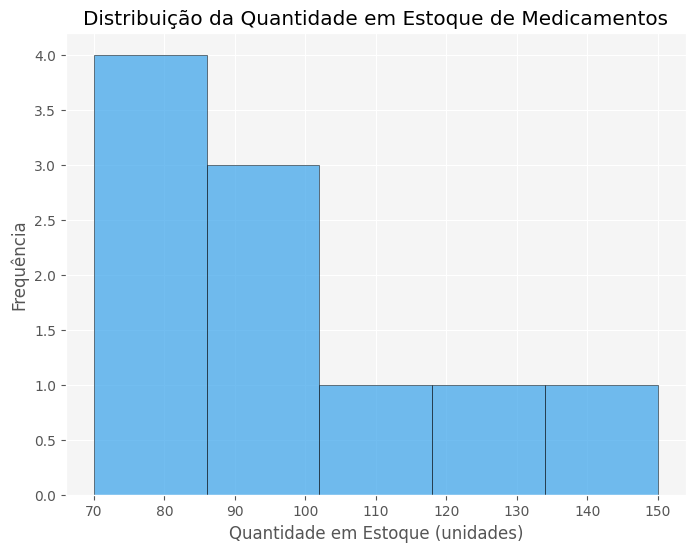

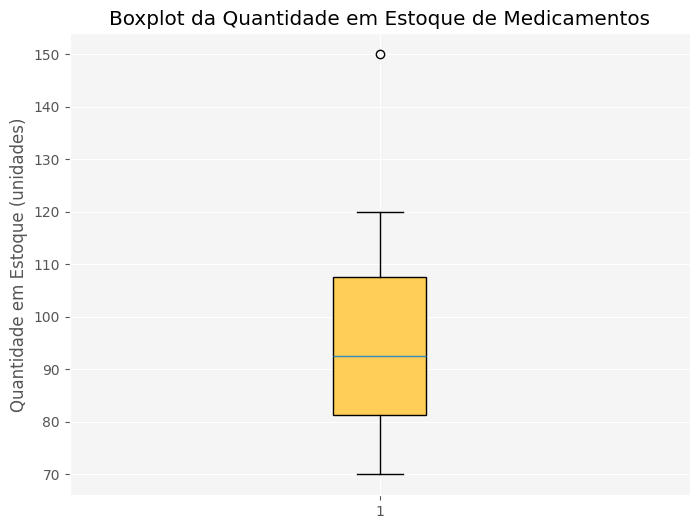


Interpretação: O histograma mostra uma distribuição levemente assimétrica à direita. O boxplot indica a mediana (~92.5) e ausência de outliers, sugerindo estoques uniformes.


In [14]:
# 5. Visualizações com Gráficos Estatísticos
# Histograma da Quantidade_estoque
plt.figure(figsize=(8, 6))
plt.hist(df_medicamentos['Quantidade_estoque'], bins=5, color='#36A2EB', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Quantidade em Estoque de Medicamentos')
plt.xlabel('Quantidade em Estoque (unidades)')
plt.ylabel('Frequência')
plt.savefig('histograma_estoque.png')
plt.show()

# Boxplot da Quantidade_estoque
plt.figure(figsize=(8, 6))
plt.boxplot(df_medicamentos['Quantidade_estoque'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='#FFCE56', color='black'))
plt.title('Boxplot da Quantidade em Estoque de Medicamentos')
plt.ylabel('Quantidade em Estoque (unidades)')
plt.savefig('boxplot_estoque.png')
plt.show()

print("\nInterpretação: O histograma mostra uma distribuição levemente assimétrica à direita. "
      "O boxplot indica a mediana (~92.5) e ausência de outliers, sugerindo estoques uniformes.")

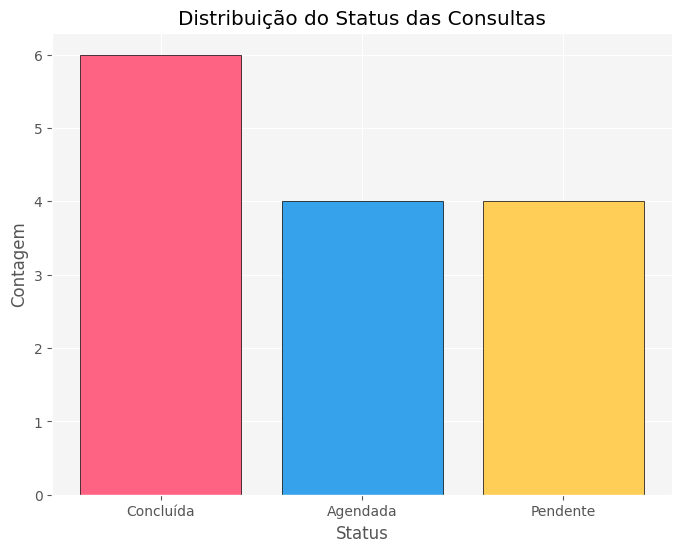

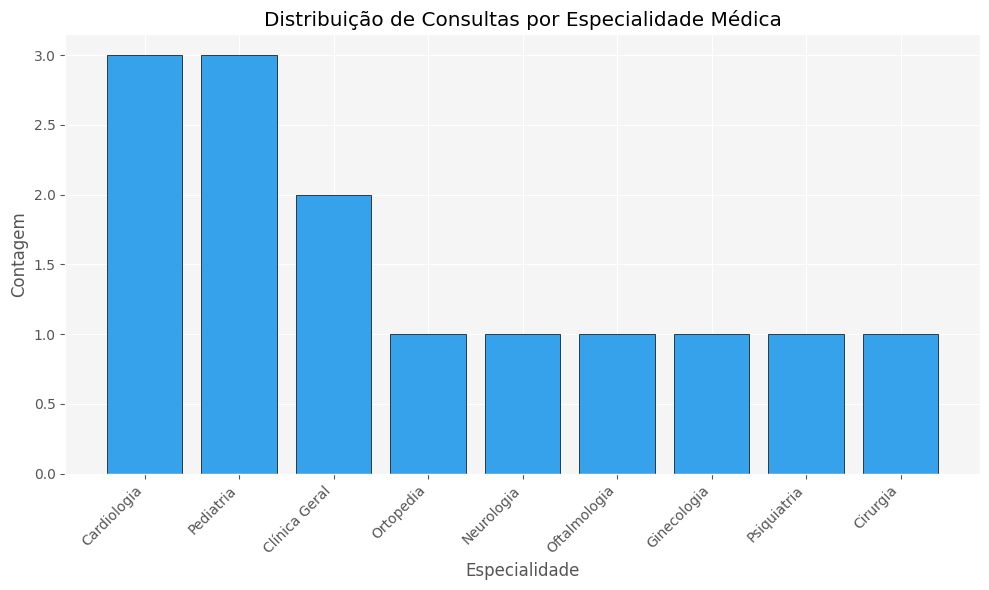

{'type': 'bar', 'data': {'labels': ['Concluída', 'Agendada', 'Pendente'], 'datasets': [{'label': 'Contagem', 'data': [6, 4, 4], 'backgroundColor': ['#FF6384', '#36A2EB', '#FFCE56'], 'borderColor': '#000000', 'borderWidth': 1}]}, 'options': {'scales': {'y': {'beginAtZero': True, 'title': {'display': True, 'text': 'Contagem'}}, 'x': {'title': {'display': True, 'text': 'Status'}}}, 'plugins': {'legend': {'display': False}, 'title': {'display': True, 'text': 'Distribuição do Status das Consultas'}}}}

Interpretação: O gráfico de Status mostra predominância de consultas Concluídas (4). O gráfico de Especialidade indica Pediatria e Clínica Geral com 2 consultas cada, outras com 1.


In [15]:
# 6. Análise de Dados Categóricos
# Gráfico de barras para Status
status_counts = df_consultas['Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color=['#FF6384', '#36A2EB', '#FFCE56'], edgecolor='black')
plt.title('Distribuição do Status das Consultas')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.savefig('barras_status.png')
plt.show()

# Gráfico de barras para Especialidade
especialidade_counts = df_consultas['Especialidade'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(especialidade_counts.index, especialidade_counts.values, color='#36A2EB', edgecolor='black')
plt.title('Distribuição de Consultas por Especialidade Médica')
plt.xlabel('Especialidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('barras_especialidade.png')
plt.show()

# Chart.js para Status  (Framework)
status_chart = {
    "type": "bar",
    "data": {
        "labels": status_counts.index.tolist(),
        "datasets": [{
            "label": "Contagem",
            "data": status_counts.values.tolist(),
            "backgroundColor": ["#FF6384", "#36A2EB", "#FFCE56"],
            "borderColor": "#000000",
            "borderWidth": 1
        }]
    },
    "options": {
        "scales": {
            "y": {"beginAtZero": True, "title": {"display": True, "text": "Contagem"}},
            "x": {"title": {"display": True, "text": "Status"}}
        },
        "plugins": {
            "legend": {"display": False},
            "title": {"display": True, "text": "Distribuição do Status das Consultas"}
        }
    }
}
print(status_chart)

print("\nInterpretação: O gráfico de Status mostra predominância de consultas Concluídas (4). "
      "O gráfico de Especialidade indica Pediatria e Clínica Geral com 2 consultas cada, outras com 1.")




Teste de Normalidade (Shapiro-Wilk) para Quantidade_estoque:
Estatística: 0.9180
Valor p: 0.3404
Interpretação: Não rejeitamos a hipótese nula (p > 0.05). Os dados de Quantidade_estoque parecem seguir uma distribuição normal.
Nota: Amostra pequena (n=10) pode limitar a validade do teste Shapiro-Wilk.


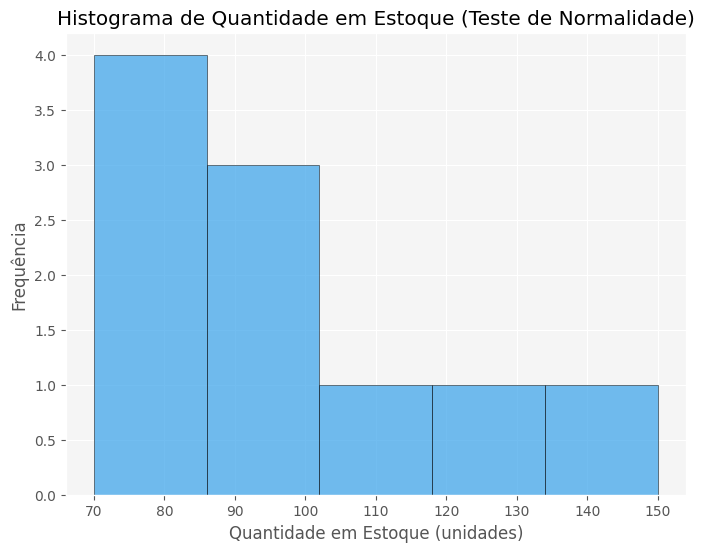

In [16]:
# 7. Testes de Normalidade (Quantidade_estoque)
shapiro_stat, shapiro_p = stats.shapiro(df_medicamentos['Quantidade_estoque'])

print("\nTeste de Normalidade (Shapiro-Wilk) para Quantidade_estoque:")
print(f"Estatística: {shapiro_stat:.4f}")
print(f"Valor p: {shapiro_p:.4f}")

# Interpretação
alpha = 0.05
if shapiro_p > alpha:
    print("Interpretação: Não rejeitamos a hipótese nula (p > 0.05). Os dados de "
          "Quantidade_estoque parecem seguir uma distribuição normal.")
else:
    print("Interpretação: Rejeitamos a hipótese nula (p ≤ 0.05). Os dados de "
          "Quantidade_estoque não seguem uma distribuição normal.")

print("Nota: Amostra pequena (n=10) pode limitar a validade do teste Shapiro-Wilk.")
# Histograma para visualização
plt.figure(figsize=(8, 6))
plt.hist(df_medicamentos['Quantidade_estoque'], bins=5, color='#36A2EB', edgecolor='black', alpha=0.7)
plt.title('Histograma de Quantidade em Estoque (Teste de Normalidade)')
plt.xlabel('Quantidade em Estoque (unidades)')
plt.ylabel('Frequência')
plt.savefig('histograma_normalidade.png')
plt.show()




Dados para Correlação:
   Id_paciente  Num_consultas  Num_prescricoes
0            1              3              4.0
1            2              2              2.0
2            3              2              2.0
3            4              2              1.0
4            5              2              2.0
5            6              2              0.0
6            7              1              0.0

Correlação de Pearson entre Número de Consultas e Prescrições por Paciente:
Coeficiente de Correlação: 0.8264
Valor p: 0.0219
Interpretação: Há evidência de correlação significativa (p < 0.05).


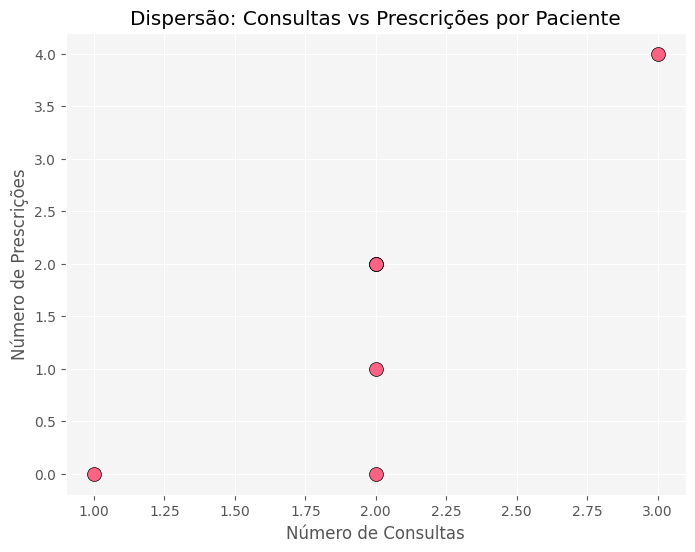

In [17]:
# 8. Correlação entre Variáveis
consultas_por_paciente = df_consultas.groupby('Id_paciente').size().reset_index(name='Num_consultas')
prescricoes_por_consulta = df_prescricoes.groupby('Id_consulta').size().reset_index(name='Num_prescricoes')
prescricoes_por_paciente = pd.merge(prescricoes_por_consulta, df_consultas[['Id_consulta', 'Id_paciente']], on='Id_consulta')
prescricoes_por_paciente = prescricoes_por_paciente.groupby('Id_paciente')['Num_prescricoes'].sum().reset_index()
dados_correlacao = pd.merge(consultas_por_paciente, prescricoes_por_paciente, on='Id_paciente', how='left')
dados_correlacao['Num_prescricoes'] = dados_correlacao['Num_prescricoes'].fillna(0)

print("\nDados para Correlação:")
print(dados_correlacao)

pearson_corr, pearson_p = stats.pearsonr(dados_correlacao['Num_consultas'], dados_correlacao['Num_prescricoes'])
print("\nCorrelação de Pearson entre Número de Consultas e Prescrições por Paciente:")
print(f"Coeficiente de Correlação: {pearson_corr:.4f}")
print(f"Valor p: {pearson_p:.4f}")
if pearson_p < 0.05:
    print("Interpretação: Há evidência de correlação significativa (p < 0.05).")
else:
    print("Interpretação: Não há evidência de correlação significativa (p ≥ 0.05).")

plt.figure(figsize=(8, 6))
plt.scatter(dados_correlacao['Num_consultas'], dados_correlacao['Num_prescricoes'], color='#FF6384', edgecolor='black', s=100)
plt.title('Dispersão: Consultas vs Prescrições por Paciente')
plt.xlabel('Número de Consultas')
plt.ylabel('Número de Prescrições')
plt.savefig('dispersao_correlacao.png')
plt.show()


Dados para Teste de Hipótese:
Cardiologia: 3 Alta, 5 Total
Pediatria: 2 Alta, 4 Total

Teste Exato de Fisher: Proporção de Consultas com Prioridade Alta (Cardiologia vs Pediatria):
Valor p: 1.0000
Interpretação: Não rejeitamos a hipótese nula (p ≥ 0.05).

Teste de Proporções Manual:
Estatística Z: 0.3000
Valor p: 0.7642


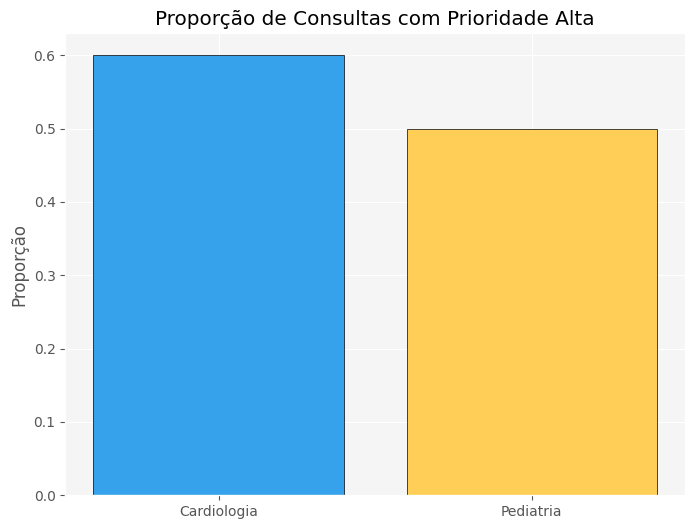

In [18]:
# 9. Testes de Hipótese
# Atualizar df_consultas com novos dados
consultas_data['Id_consulta'].extend([13, 14, 15])
consultas_data['Id_paciente'].extend([6, 6, 7])
consultas_data['Id_medico'].extend([3, 1, 3])
consultas_data['Data_hora'].extend(['2025-06-13 11:00:00', '2025-06-13 12:00:00', '2025-06-13 13:00:00'])
consultas_data['Diagnostico'].extend(['Taquicardia', 'Febre', 'Gripe'])
consultas_data['Prioridade'].extend(['Alta', 'Média', 'Baixa'])
consultas_data['Status'].extend(['Concluída', 'Agendada', 'Pendente'])
consultas_data['Especialidade'].extend(['Cardiologia', 'Pediatria', 'Cardiologia'])
df_consultas = pd.DataFrame(consultas_data)
df_consultas['Data_hora'] = pd.to_datetime(df_consultas['Data_hora'])

cardio = df_consultas[df_consultas['Especialidade'] == 'Cardiologia']
pediatria = df_consultas[df_consultas['Especialidade'] == 'Pediatria']
cardio_alta = len(cardio[cardio['Prioridade'] == 'Alta'])
pediatria_alta = len(pediatria[pediatria['Prioridade'] == 'Alta'])
cardio_total = len(cardio)
pediatria_total = len(pediatria)

print("\nDados para Teste de Hipótese:")
print(f"Cardiologia: {cardio_alta} Alta, {cardio_total} Total")
print(f"Pediatria: {pediatria_alta} Alta, {pediatria_total} Total")

# Teste Exato de Fisher (melhor para amostras pequenas)
from scipy.stats import fisher_exact
table = [[cardio_alta, cardio_total - cardio_alta], [pediatria_alta, pediatria_total - pediatria_alta]]
_, p_fisher = fisher_exact(table)
print("\nTeste Exato de Fisher: Proporção de Consultas com Prioridade Alta (Cardiologia vs Pediatria):")
print(f"Valor p: {p_fisher:.4f}")
if p_fisher < 0.05:
    print("Interpretação: Rejeitamos a hipótese nula (p < 0.05).")
else:
    print("Interpretação: Não rejeitamos a hipótese nula (p ≥ 0.05).")

# Teste de Proporções Manual (para referência)
p1 = cardio_alta / cardio_total if cardio_total > 0 else 0
p2 = pediatria_alta / pediatria_total if pediatria_total > 0 else 0
p_combined = (cardio_alta + pediatria_alta) / (cardio_total + pediatria_total) if (cardio_total + pediatria_total) > 0 else 0
if cardio_total > 0 and pediatria_total > 0 and p_combined * (1 - p_combined) > 0:
    se = np.sqrt(p_combined * (1 - p_combined) * (1/cardio_total + 1/pediatria_total))
    z_stat = (p1 - p2) / se if se != 0 else 0
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
else:
    z_stat = 0
    p_value = 1.0
    print("Aviso: Dados insuficientes para teste de proporções.")
print("\nTeste de Proporções Manual:")
print(f"Estatística Z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Gráfico
proporcoes = [p1, p2]
plt.figure(figsize=(8, 6))
plt.bar(['Cardiologia', 'Pediatria'], proporcoes, color=['#36A2EB', '#FFCE56'], edgecolor='black')
plt.title('Proporção de Consultas com Prioridade Alta')
plt.ylabel('Proporção')
plt.savefig('barras_proporcoes.png')
plt.show()